In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import numpy as np
import matplotlib.dates as mdates



In [2]:
!gdown --id '1haP2cI2DV7-jzD3iAl3uKqsIzAFWVEMB' --output midstream.xlsx

Downloading...
From: https://drive.google.com/uc?id=1haP2cI2DV7-jzD3iAl3uKqsIzAFWVEMB
To: /content/midstream.xlsx
100% 12.9k/12.9k [00:00<00:00, 21.4MB/s]


In [3]:
df = pd.read_excel('midstream.xlsx')
rows = df.shape[0]

In [4]:
time_label = []
for i in range(1, rows):
    time_label.append(df.iat[i, 0])
midstream = []
FOXCONN = []
ASE = []
SERCOMM = []
ACCTON = []
COMPAL = []
name = ['FOXCONN','ASE','SERCOMM','ACCTON','COMPAL']
midstream.append(FOXCONN)
midstream.append(ASE)
midstream.append(SERCOMM)
midstream.append(ACCTON)
midstream.append(COMPAL)
for j in range(5):
  for k in range(1, rows):
    midstream[j].append(df.iat[k, (2*j)+1])
    
tl = []
for element in time_label:
  tl.append(int(element.split('年')[1][:-1]) + 12*int(element.split('年')[0][3])-18)



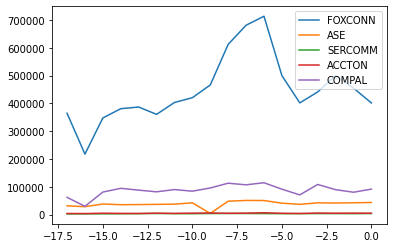

In [33]:
for k in range(5):
  plt.plot(tl, midstream[k], label = name[k])
plt.legend(loc = 1)
plt.show()


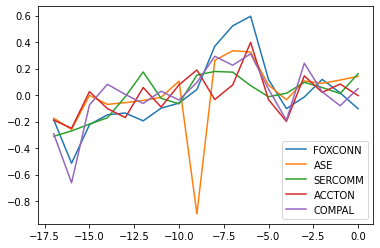

In [8]:
midstream_normed = []
for s in range(5):
  midstream_normed.append([])
for i in range(5):
  u = (sum(midstream[i])/len(midstream[i]))
  for ele in midstream[i]:
    midstream_normed[i].append((ele - u) / u)
for k in range(5):
  plt.plot(tl, midstream_normed[k], label = name[k])
plt.legend(loc = 0)
plt.show()

In [9]:
import statistics
std_compare = []
for i in range(5):
    std_compare.append(statistics.stdev(midstream_normed[i]))
std_compare

[0.2715721869701016,
 0.2730553208488073,
 0.1555211162858995,
 0.1582691989065128,
 0.22865388422330368]

In [11]:
#處理確診人數資訊
!gdown --id '151UEEw6bTO3g6JNdNFrpfPC2TAFUNk-0' --output china.xlsx
!gdown --id '12iGYZkq9uAcC8P4g5WNThqz76lg6EWWG' --output taiwan.xlsx
!gdown --id '1nglelEdrfH_fskn7m24FDc97Mn4hqh2v' --output america.xlsx
!gdown --id '14TFGjaWEDJ0CspVwCRO5BybxyAHLVs0x' --output europe.xlsx
taiwan = pd.read_excel('taiwan.xlsx')
rows = taiwan.shape[0]
china = pd.read_excel('china.xlsx')
america = pd.read_excel('america.xlsx')
europe = pd.read_excel('europe.xlsx')
taiwan.iat[1, 5]

Downloading...
From: https://drive.google.com/uc?id=151UEEw6bTO3g6JNdNFrpfPC2TAFUNk-0
To: /content/china.xlsx
100% 103k/103k [00:00<00:00, 38.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=12iGYZkq9uAcC8P4g5WNThqz76lg6EWWG
To: /content/taiwan.xlsx
100% 110k/110k [00:00<00:00, 52.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1nglelEdrfH_fskn7m24FDc97Mn4hqh2v
To: /content/america.xlsx
100% 61.1k/61.1k [00:00<00:00, 80.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=14TFGjaWEDJ0CspVwCRO5BybxyAHLVs0x
To: /content/europe.xlsx
100% 112k/112k [00:00<00:00, 40.4MB/s]


15637

In [12]:
#Taiwan
T = []
for i in range(1, taiwan.shape[0]):
  T.append(taiwan.iat[i, 5])
 
days = list(range(len(T)))
days.reverse()

r = len(T)
for k in range(r):
  days[k] -= r

In [13]:
#China
C = []
for i in range(1, china.shape[0]):
  C.append(china.iat[i, 5])
 
days = list(range(len(C)))
days.reverse()

r = len(C)
for k in range(r):
  days[k] -= r

In [14]:
#America
A = []
for i in range(1, america.shape[0]):
  A.append(america.iat[i, 3])
 
days = list(range(len(A)))
days.reverse()

r = len(A)
for k in range(r):
  days[k] -= r

In [15]:
#Europe
E = []
for i in range(1, europe.shape[0]):
  E.append(europe.iat[i, 5])
 
days = list(range(len(E)))
days.reverse()

r = len(E)
for k in range(r):
  days[k] -= r

In [16]:

from math import *
T_monthly = []
T_monthly_log = []
C_monthly = []
C_monthly_log = []
A_monthly = []
A_monthly_log = []
E_monthly = []
E_monthly_log = []

day = [16, 29, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31, 31, 28, 31, 30, 31, 30]
count = 0
for ele in day:
  count += ele
  T_monthly.append(T[-1*count])
  T_monthly_log.append(log(T[-1*count]))
  C_monthly.append(C[-1*count])
  C_monthly_log.append(log(C[-1*count]))
  A_monthly.append(A[-1*count])
  A_monthly_log.append(log(A[-1*count]))
  E_monthly.append(E[-1*count])
  E_monthly_log.append(log(E[-1*count]))

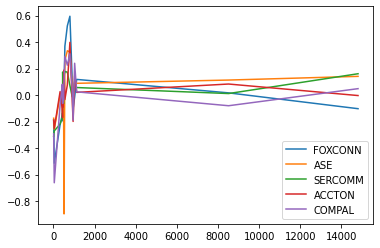

In [18]:
# 確診人數&營業額變化
for k in range(5):
  plt.plot(T_monthly, midstream_normed[k], label = name[k])
plt.legend()
plt.show()

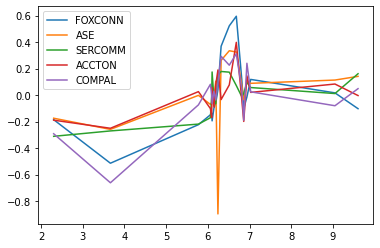

In [20]:
for k in range(5):
  plt.plot(T_monthly_log, midstream_normed[k], label = name[k])
plt.legend()
plt.show()

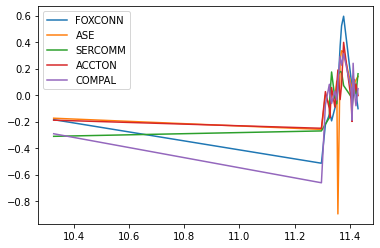

In [21]:
#china
for k in range(5):
  plt.plot(C_monthly_log, midstream_normed[k], label = name[k])
plt.legend()
plt.show()

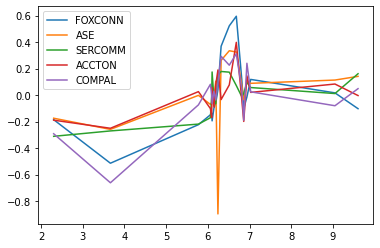

In [22]:
#Taiwan
for k in range(5):
  plt.plot(T_monthly_log, midstream_normed[k], label = name[k])
plt.legend()
plt.show()

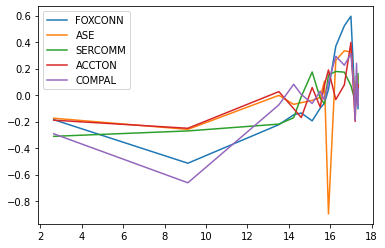

In [23]:
#America
for k in range(5):
  plt.plot(A_monthly_log, midstream_normed[k], label = name[k])
plt.legend()
plt.show()

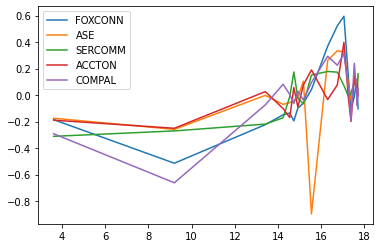

In [25]:
#Europe
for k in range(5):
  plt.plot(E_monthly_log, midstream_normed[k], label = name[k])
plt.legend()
plt.show()

In [28]:
# 計算中游企業與中國總確診人數的相關係數

import scipy.stats as stats
for i in range(5):
    print(name[i]+'營業額和中國確診人數(log)的相關係數  =',stats.pearsonr(C_monthly_log, midstream_normed[i])[0])

FOXCONN營業額和中國確診人數(log)的相關係數  = 0.2340035653339678
ASE營業額和中國確診人數(log)的相關係數  = 0.21123879421307512
SERCOMM營業額和中國確診人數(log)的相關係數  = 0.5707681527310284
ACCTON營業額和中國確診人數(log)的相關係數  = 0.3403396228381394
COMPAL營業額和中國確診人數(log)的相關係數  = 0.37162165846553175


In [27]:
# 計算中游企業與台灣總確診人數的相關係數
import scipy.stats as stats
for i in range(5):
    print(name[i]+'營業額和台灣確診人數(log)的相關係數  =',stats.pearsonr(T_monthly_log,midstream_normed[i])[0])

FOXCONN營業額和台灣確診人數(log)的相關係數  = 0.3344012008765333
ASE營業額和台灣確診人數(log)的相關係數  = 0.34900888560810006
SERCOMM營業額和台灣確診人數(log)的相關係數  = 0.6663978595565591
ACCTON營業額和台灣確診人數(log)的相關係數  = 0.42039149496470957
COMPAL營業額和台灣確診人數(log)的相關係數  = 0.5042383683126562


In [30]:
# 計算中游企業與美國總確診人數的相關係數
import scipy.stats as stats
for i in range(5):
    print(name[i]+'營業額和美國確診人數(log)的相關係數  =',stats.pearsonr(A_monthly_log, midstream_normed[i])[0])

FOXCONN營業額和美國確診人數(log)的相關係數  = 0.4894677891864871
ASE營業額和美國確診人數(log)的相關係數  = 0.33129786582011433
SERCOMM營業額和美國確診人數(log)的相關係數  = 0.7604112903525557
ACCTON營業額和美國確診人數(log)的相關係數  = 0.5077771226939799
COMPAL營業額和美國確診人數(log)的相關係數  = 0.6408759832687202


In [31]:
# 計算中游企業與歐洲總確診人數的相關係數
import scipy.stats as stats
for i in range(5):
    print(name[i]+'營業額和歐洲確診人數(log)的相關係數  =',stats.pearsonr(E_monthly_log, midstream_normed[i])[0])

FOXCONN營業額和歐洲確診人數(log)的相關係數  = 0.5105199094012985
ASE營業額和歐洲確診人數(log)的相關係數  = 0.36247454165776494
SERCOMM營業額和歐洲確診人數(log)的相關係數  = 0.7630864766025978
ACCTON營業額和歐洲確診人數(log)的相關係數  = 0.5041481947847163
COMPAL營業額和歐洲確診人數(log)的相關係數  = 0.6462882450291915


In [34]:
import numpy as np
import pandas as pd
from pylab import mpl, plt 
plt.style.use('seaborn')
mpl.rcParams['font.family']='serif'
from matplotlib import pyplot
from matplotlib.pyplot import rcParams
import matplotlib.pyplot as plt
import pandas_datareader.data as web

In [35]:
window=20
%matplotlib inline

In [37]:
!pip install yfinance
import yfinance as yf

     |████████████████████████████████| 6.3 MB 3.4 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23919 sha256=9f7bcc914684684c52851ff90751802b335d5b09a391f96a1c21bfdf2dde880b
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [45]:
#鴻海
stockNo = "2317.TW"
start_date = "2020-01-01"
end_date = "2021-06-30"
foxconn = yf.download(stockNo, start_date, end_date)

[*********************100%***********************]  1 of 1 completed


In [46]:
foxconn

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,91.000000,91.500000,90.300003,90.800003,83.289825,20758722
2020-01-03,91.400002,92.199997,90.800003,91.599998,84.023659,37936877
2020-01-06,91.099998,91.099998,90.099998,90.500000,83.014648,26352522
2020-01-07,90.500000,91.000000,88.300003,89.099998,81.730438,42728140
2020-01-08,87.900002,88.099998,86.500000,86.500000,79.345490,56101121
...,...,...,...,...,...,...
2021-06-23,109.000000,112.000000,108.500000,111.500000,107.535561,27710302
2021-06-24,111.500000,114.000000,111.000000,113.000000,108.982224,31065987
2021-06-25,114.000000,115.000000,113.000000,113.000000,108.982224,35574740


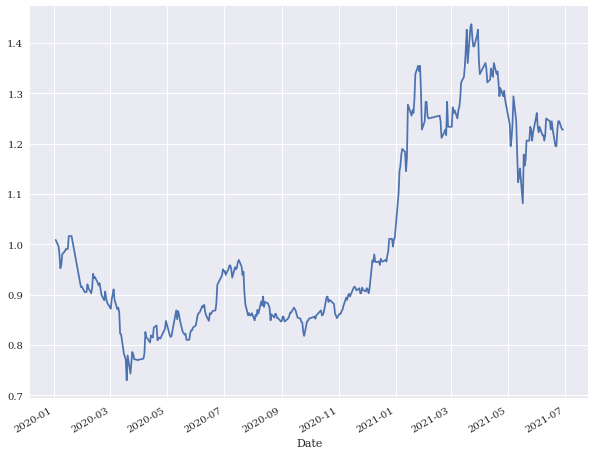

In [47]:
rets2=np.log(accton['Close']/foxconn['Close'].shift(1))
rets2.cumsum().apply(np.exp).plot(figsize=(10,8))

In [51]:
#日月光
stockNo = "3711.TW"
start_date = "2020-01-01"
end_date = "2021-06-30"
ase = yf.download(stockNo, start_date, end_date)

[*********************100%***********************]  1 of 1 completed


In [52]:
ase

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,83.800003,83.800003,82.500000,82.800003,80.433235,7381334
2020-01-03,83.800003,83.800003,80.800003,81.800003,79.461823,11206834
2020-01-06,80.800003,80.800003,78.199997,78.699997,76.450424,14978274
2020-01-07,79.000000,79.400002,78.000000,78.699997,76.450424,8119366
2020-01-08,78.000000,78.599998,77.400002,77.400002,75.187592,8314294
...,...,...,...,...,...,...
2021-06-23,114.000000,116.000000,113.500000,116.000000,116.000000,10769575
2021-06-24,116.000000,116.000000,114.000000,115.500000,115.500000,5486230
2021-06-25,116.500000,118.000000,115.500000,117.500000,117.500000,10972546


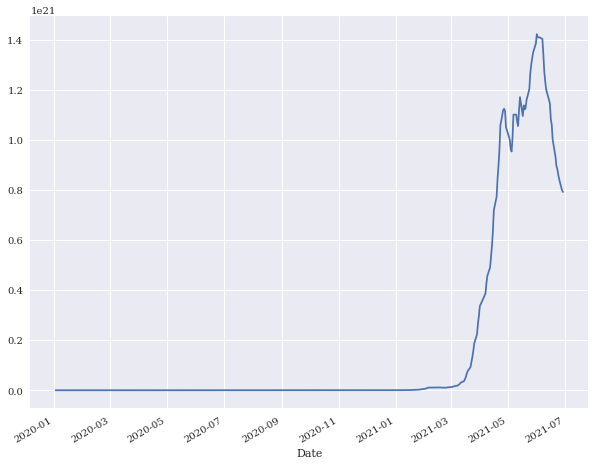

In [53]:
rets2=np.log(accton['Close']/ase['Close'].shift(1))
rets2.cumsum().apply(np.exp).plot(figsize=(10,8))

In [48]:
#中磊
stockNo = "5388.TW"
start_date = "2020-01-01"
end_date = "2021-06-30"
sercomm = yf.download(stockNo, start_date, end_date)

[*********************100%***********************]  1 of 1 completed


In [49]:
sercomm

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,78.000000,78.800003,77.900002,78.199997,72.621338,1513500
2020-01-03,78.900002,79.000000,77.000000,77.000000,71.506950,1152500
2020-01-06,77.000000,77.000000,75.599998,75.599998,70.206825,751050
2020-01-07,75.800003,76.099998,74.300003,74.400002,69.092430,1249801
2020-01-08,74.599998,75.300003,74.300003,74.300003,68.999565,1032700
...,...,...,...,...,...,...
2021-06-23,66.400002,67.500000,66.000000,66.800003,64.290176,779280
2021-06-24,67.300003,67.500000,66.800003,66.900002,64.386414,286100
2021-06-25,67.500000,68.800003,67.199997,68.800003,66.215034,980055


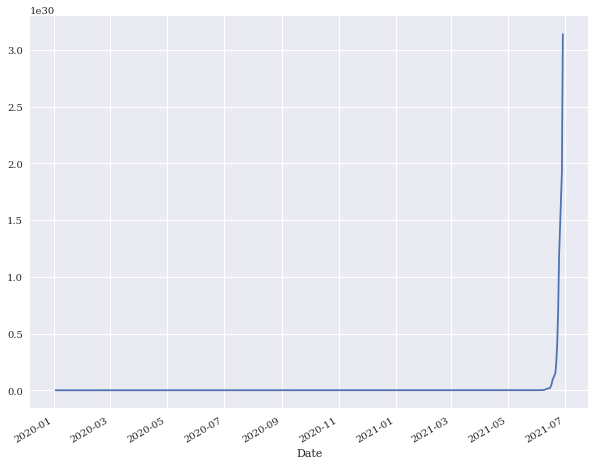

In [50]:
rets2=np.log(accton['Close']/sercomm['Close'].shift(1))
rets2.cumsum().apply(np.exp).plot(figsize=(10,8))

In [38]:
#智邦
stockNo = "2345.TW"
start_date = "2020-01-01"
end_date = "2021-06-30"
accton = yf.download(stockNo, start_date, end_date)

[*********************100%***********************]  1 of 1 completed


In [39]:

accton

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,171.0,175.0,170.0,175.0,170.614151,7847175
2020-01-03,177.5,178.0,169.5,171.5,167.201874,7772132
2020-01-06,170.0,171.0,168.5,170.0,165.739471,2382958
2020-01-07,172.0,172.5,162.0,162.0,157.939957,6863208
2020-01-08,158.5,165.5,158.0,165.0,160.864777,4033239
...,...,...,...,...,...,...
2021-06-23,302.0,316.0,300.5,315.5,315.500000,3639297
2021-06-24,315.0,318.0,312.5,314.0,314.000000,1212881
2021-06-25,318.5,342.0,318.0,331.0,331.000000,5021508


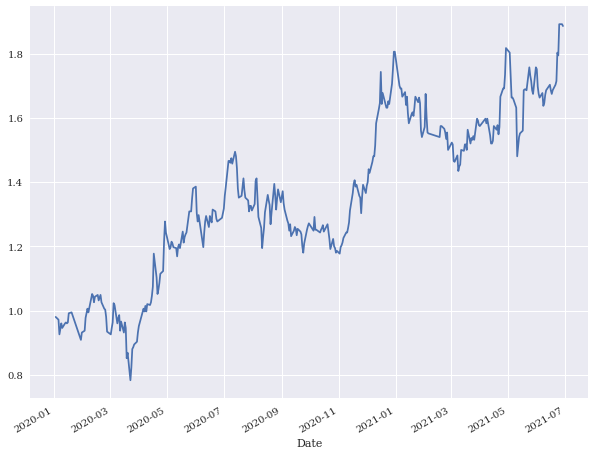

In [40]:
rets2=np.log(accton['Close']/accton['Close'].shift(1))
rets2.cumsum().apply(np.exp).plot(figsize=(10,8))

In [41]:
#仁寶
stockNo = "2324.TW"
start_date = "2020-01-01"
end_date = "2021-06-30"
compal = yf.download(stockNo, start_date, end_date)

[*********************100%***********************]  1 of 1 completed


In [42]:
compal

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,18.900000,18.950001,18.850000,18.850000,16.684313,4538657
2020-01-03,18.950001,18.950001,18.799999,18.900000,16.728567,7517182
2020-01-06,18.850000,18.900000,18.750000,18.900000,16.728567,6716266
2020-01-07,18.900000,18.900000,18.750000,18.750000,16.595802,5610981
2020-01-08,18.700001,18.750000,18.600000,18.600000,16.463037,7512842
...,...,...,...,...,...,...
2021-06-23,22.299999,22.350000,22.000000,22.100000,22.100000,22826397
2021-06-24,22.100000,22.250000,22.049999,22.100000,22.100000,15659746
2021-06-25,22.150000,22.200001,22.049999,22.049999,22.049999,13456594


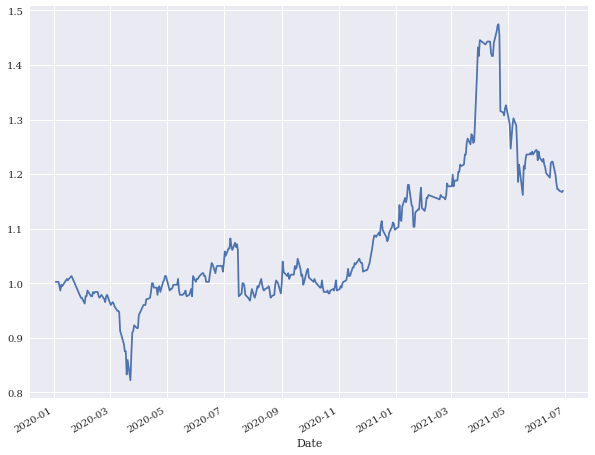

In [43]:
rets2=np.log(compal['Close']/compal['Close'].shift(1))
rets2.cumsum().apply(np.exp).plot(figsize=(10,8))

In [54]:
dfs = [foxconn['Close'],ase['Close'],sercomm['Close'],accton['Close'],compal['Close']]
df_all = pd.DataFrame(index=foxconn['Close'].index)


In [55]:
for i in dfs:
    df_all = df_all.merge(i, how='left',right_index = True,left_index = True)
df_all

,Close_x,Close_y,Close_x,Close_y,Close
Date,,,,,
2020-01-02,90.800003,82.800003,78.199997,90.800003,18.850000
2020-01-03,91.599998,81.800003,77.000000,91.599998,18.900000
2020-01-06,90.500000,78.699997,75.599998,90.500000,18.900000
2020-01-07,89.099998,78.699997,74.400002,89.099998,18.750000
2020-01-08,86.500000,77.400002,74.300003,86.500000,18.600000
...,...,...,...,...,...
2021-06-23,111.500000,116.000000,66.800003,111.500000,22.100000
2021-06-24,113.000000,115.500000,66.900002,113.000000,22.100000
2021-06-25,113.000000,117.500000,68.800003,113.000000,22.049999


In [56]:
df_all.columns = ['foxconn','ase','sercomm','accton','compal']
df_all

,foxconn,ase,sercomm,accton,compal
Date,,,,,
2020-01-02,90.800003,82.800003,78.199997,90.800003,18.850000
2020-01-03,91.599998,81.800003,77.000000,91.599998,18.900000
2020-01-06,90.500000,78.699997,75.599998,90.500000,18.900000
2020-01-07,89.099998,78.699997,74.400002,89.099998,18.750000
2020-01-08,86.500000,77.400002,74.300003,86.500000,18.600000
...,...,...,...,...,...
2021-06-23,111.500000,116.000000,66.800003,111.500000,22.100000
2021-06-24,113.000000,115.500000,66.900002,113.000000,22.100000
2021-06-25,113.000000,117.500000,68.800003,113.000000,22.049999


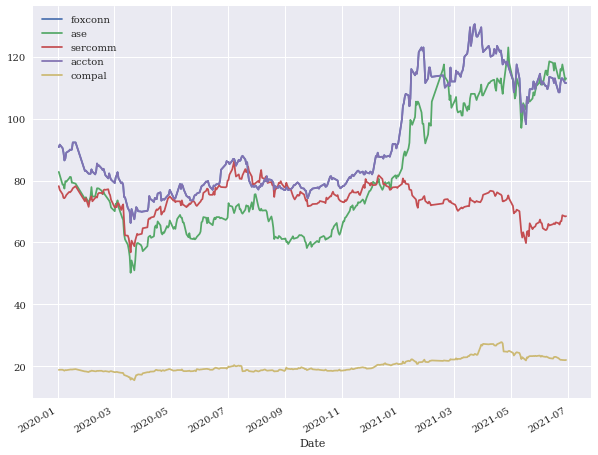

In [57]:
df_all.plot(figsize=(10,8))

In [59]:
df_std = np.std(df_all, ddof=1)
df_std.sort_values(ascending=False)

ase        19.375150
accton     17.162704
foxconn    17.162704
sercomm     5.130393
compal      2.402036
dtype: float64

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f927d141250>)

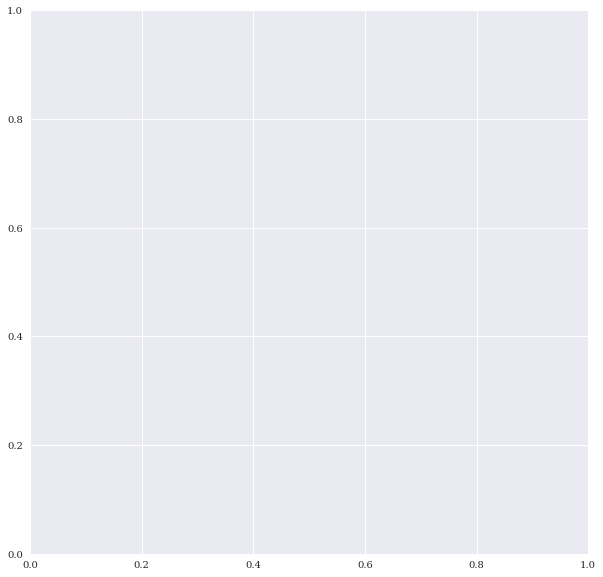

In [60]:

df_corr = df_all.corr()
plt.subplots(figsize=(10, 10)) # 設定畫面大小

In [61]:
import seaborn as sns

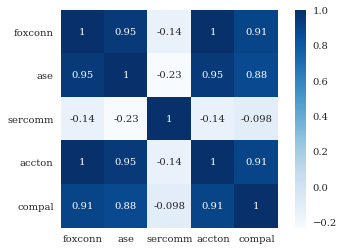

In [62]:

sns.heatmap(df_corr, annot=True, vmax=1, square=True, cmap="Blues")
plt.show()